
<h1><center>EDSA Advanced Regression Predict Notebook</center></h1>


# Table Of Contents

* [1. Introduction](#Intro)
     - [1.1 Context](Context)
     - [1.2 Problem Statement](#Proble_Statement)
     - [1.3 Data Description](#Datasets)
* [2. Data Cleaning and Exploration](#EDA)
* [3. Feature Selection](#Feature_Selection)
* [4. Model Fitting](#Model_Fitting)
* [5. Conclusion](#Conclusion)


## 1. Introduction
### 1.1 Context
Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season? 

### 1.2 Problem Statement
With the context, we are being challenged with the task of creating a Machine Learning model that is able to predict accurately how much a kilogram of Golden Delicious Apples will cost, given certain parameters. 

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.



### 1.3 Data Description
#### 1.3.1 Data Source
The collection of this data which we use as our data source was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs, which was provided by Kaggle(https://www.kaggle.com/c/edsa-apple-prices-challenge/data).

#### 1.3.2 Data Input Files
* df-train_set.csv - The training split of the dataset, denoted as "train_data" in our code.
* df-test_set.csv - The test split of the dataset, denoted as "test_data" in our code.
* sample_submission.csv - Sample of the submission format for the hackathon.

#### 1.3.3 Data Fields
* Province - Which province the produce was grown
* Container - The code for the type of container
* Size_Grade - The class of the produce according to their quality
* Weight_Kg - The total weight in kilograms
* Commodities - The type of produce, e.g. Golden Delicious Apples
* Date - The date of the sale
* Sales_Total - The total sales price
* Total_Qty_Sold - The number of produce sold
* Total_Kg_Sold - The total weight of the produce sold in kilograms
* Stock_On_Hand - The amount of produce the store has
* Avg_Price_Per_Kg - The average price per kilogram


## 2. Data Cleaning and Exploration
### 2.1 Import Relevant Libraries/Packages

In [1]:
# Import packages we need to solve this challenge

#Data Analysis
import pandas as pd
import numpy as np

#Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Machine Learning Modelling
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### 2.2 Import Datasets

In [2]:
#Load Train Data
train_data = pd.read_csv('df-train_set.csv')

In [3]:
# Load Test Data
test_data = pd.read_csv('df-test_set.csv')

In [4]:
#Load Sample Data
sample_data = pd.read_csv('sample_submission.csv')

### 2.3 Data Cleaning and Exploration

In [5]:
#Print training data head
train_data.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [6]:
#Training data dimensions
train_data.shape

(64376, 13)

In [7]:
train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


<AxesSubplot:>

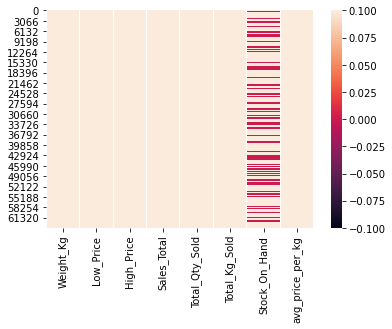

In [8]:
sns.heatmap(train_data[['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand','avg_price_per_kg']])

In [9]:
#Check training data if there are null values
train_data.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

In [10]:
#Inconsistent Column names
train_data.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg'],
      dtype='object')

In [11]:
#Fixing the above
train_data = train_data.rename(columns={'avg_price_per_kg':'Avg_Price_Per_Kg'})
train_data.columns

Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'Avg_Price_Per_Kg'],
      dtype='object')